In [1]:
# Importing all the libraries
from bs4 import BeautifulSoup, Comment
import re
import requests
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Word Clouds

This is a beautiful visualization which used wordcloud package. Essentially showing common research themes across the institutes.
- The bigger the font , the more common in the keyword.
- Clearly Quantum and condensed matter research are most common in SN Bose, Kolkata

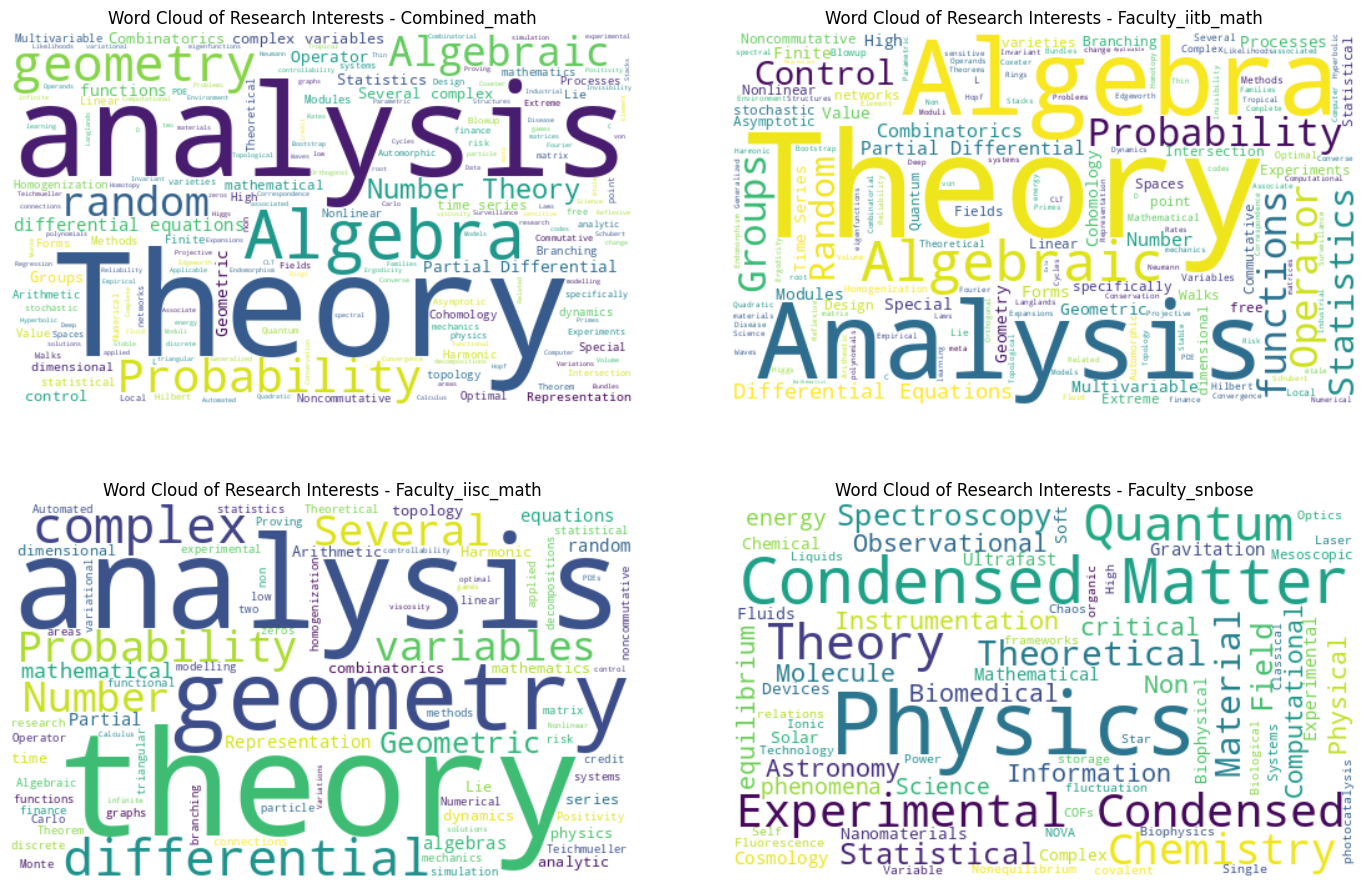

In [2]:
# Creating a word cloud for research keywords

# Connect to the SQLite database
conn = sqlite3.connect('Faculty_list.db')

# Create a 2x2 subplot grid for word clouds
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)

# Function to generate and plot word cloud for a specific table
def create_word_cloud(ax, table_name, title_prefix):
    query_research_keywords = f'''
    SELECT Research_Interests
    FROM {table_name}
    '''
    research_keywords_data = pd.read_sql(query_research_keywords, conn)
    research_keywords_text = ' '.join(research_keywords_data['Research_Interests'].dropna())

    # Generate word cloud
    wordcloud = WordCloud(width=500, height=300, background_color='white').generate(research_keywords_text)

    # Plotting
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud of Research Interests - {title_prefix}')

# Call the function for each individual table
create_word_cloud(axs[0, 0], 'Faculty_math_combined', 'Combined_math')
create_word_cloud(axs[0, 1], 'Faculty_iitb_math', 'Faculty_iitb_math')
create_word_cloud(axs[1, 0], 'faculty_iisc_math', 'Faculty_iisc_math')
create_word_cloud(axs[1, 1], 'faculty_snbose', 'Faculty_snbose')

# Show the combined plot
plt.show()

# Close the database connection
conn.close()

## Number of faculty per Department

- The abbreviations could be checked from the main website for SN bose Institute, Kolkata.
- CMMP has the highest number of Faculty in SN Bose Institute.

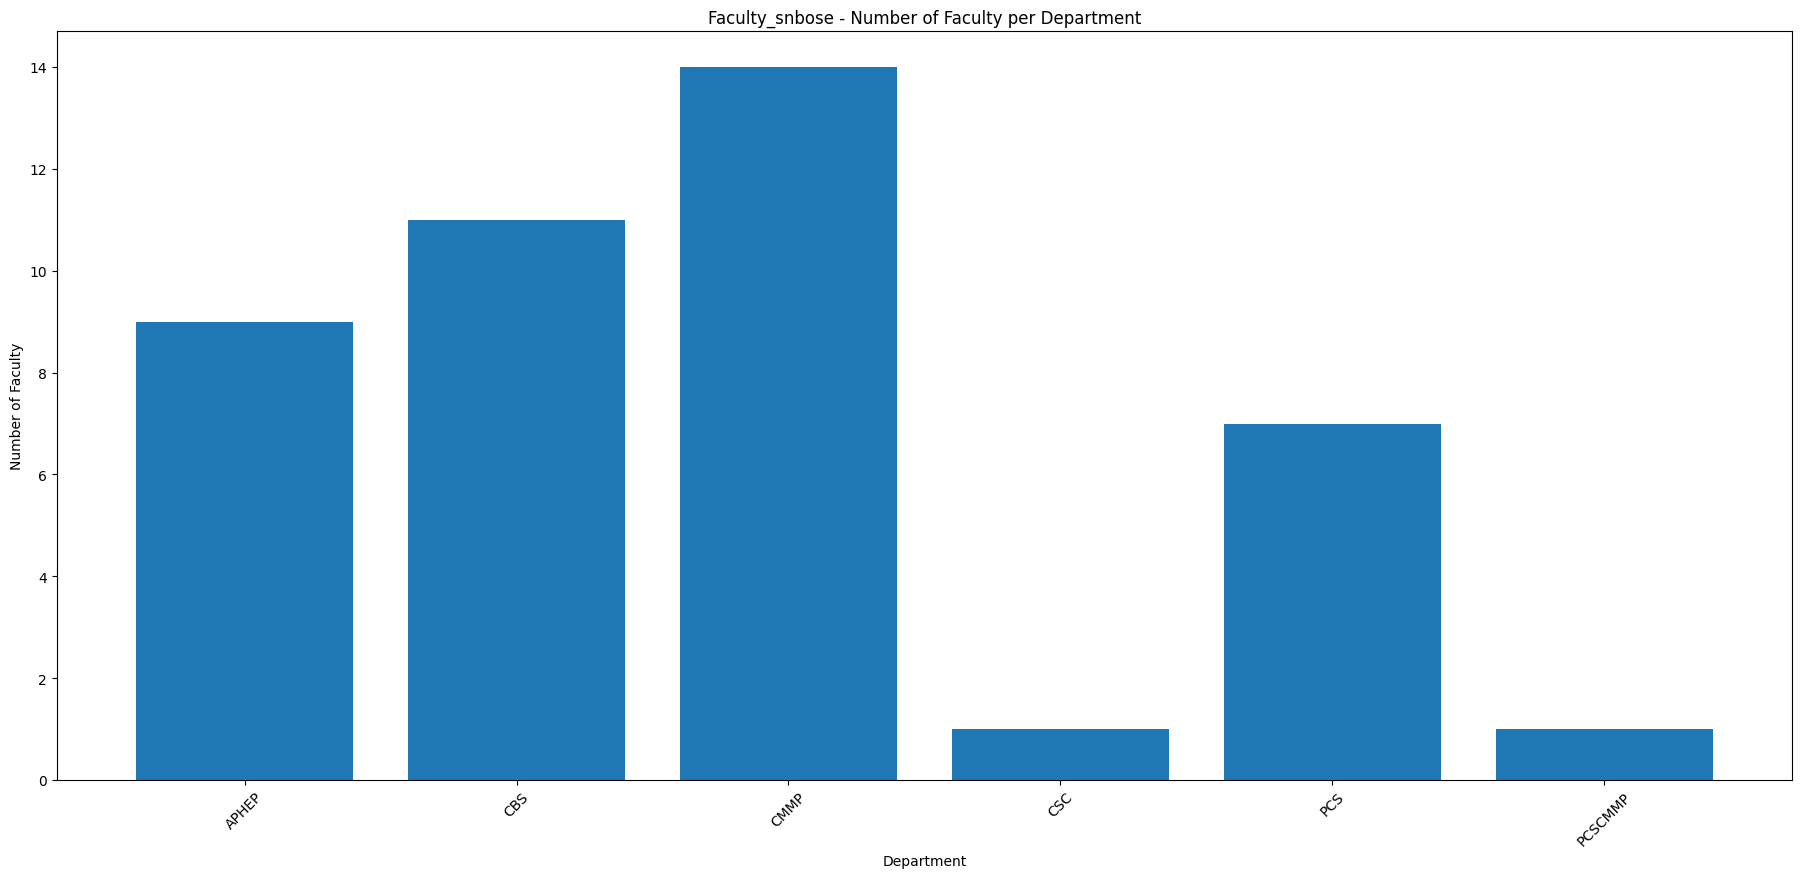

In [3]:
# Generating the plot for Number of faculty per department

# Connect to the SQLite database
conn = sqlite3.connect('Faculty_list.db')

# Function to create visualizations for an individual table
def create_visualizations_for_table(ax, table_name, title_prefix):
    # Query for Number of faculty per department
    query_department_faculty_count = f'''
    SELECT Department, COUNT(*) as FacultyCount
    FROM {table_name}
    GROUP BY Department
    '''
    department_faculty_data = pd.read_sql(query_department_faculty_count, conn)

    # Plotting
    ax.bar(department_faculty_data['Department'], department_faculty_data['FacultyCount'])
    ax.set_xlabel('Department')
    ax.set_ylabel('Number of Faculty')
    ax.set_title(f'{title_prefix} - Number of Faculty per Department')
    ax.tick_params(axis='x', rotation=45)  # Removed 'ha' parameter

# Create a 2x2 subplot grid
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
fig.tight_layout(pad=8.0)

# Call the function for each individual table
#create_visualizations_for_table(axs[0, 0], 'Faculty_math_combined', 'Combined_math')
#create_visualizations_for_table(axs[0, 1], 'Faculty_iitb_math', 'Faculty_iitb_math')
#create_visualizations_for_table(axs[1, 0], 'faculty_iisc_math', 'Faculty_iisc_math')
create_visualizations_for_table(axs, 'faculty_snbose', 'Faculty_snbose')

# Show the combined plot
plt.show()

# Close the database connection
conn.close()


### Common Location/Institute for PhD amongst the faculty

- Even though the data is not cleaned much (for SN Bose, Kolkata), we can see a clear trend that most of the faculty have done their PhDs from TIFR Mumbai.

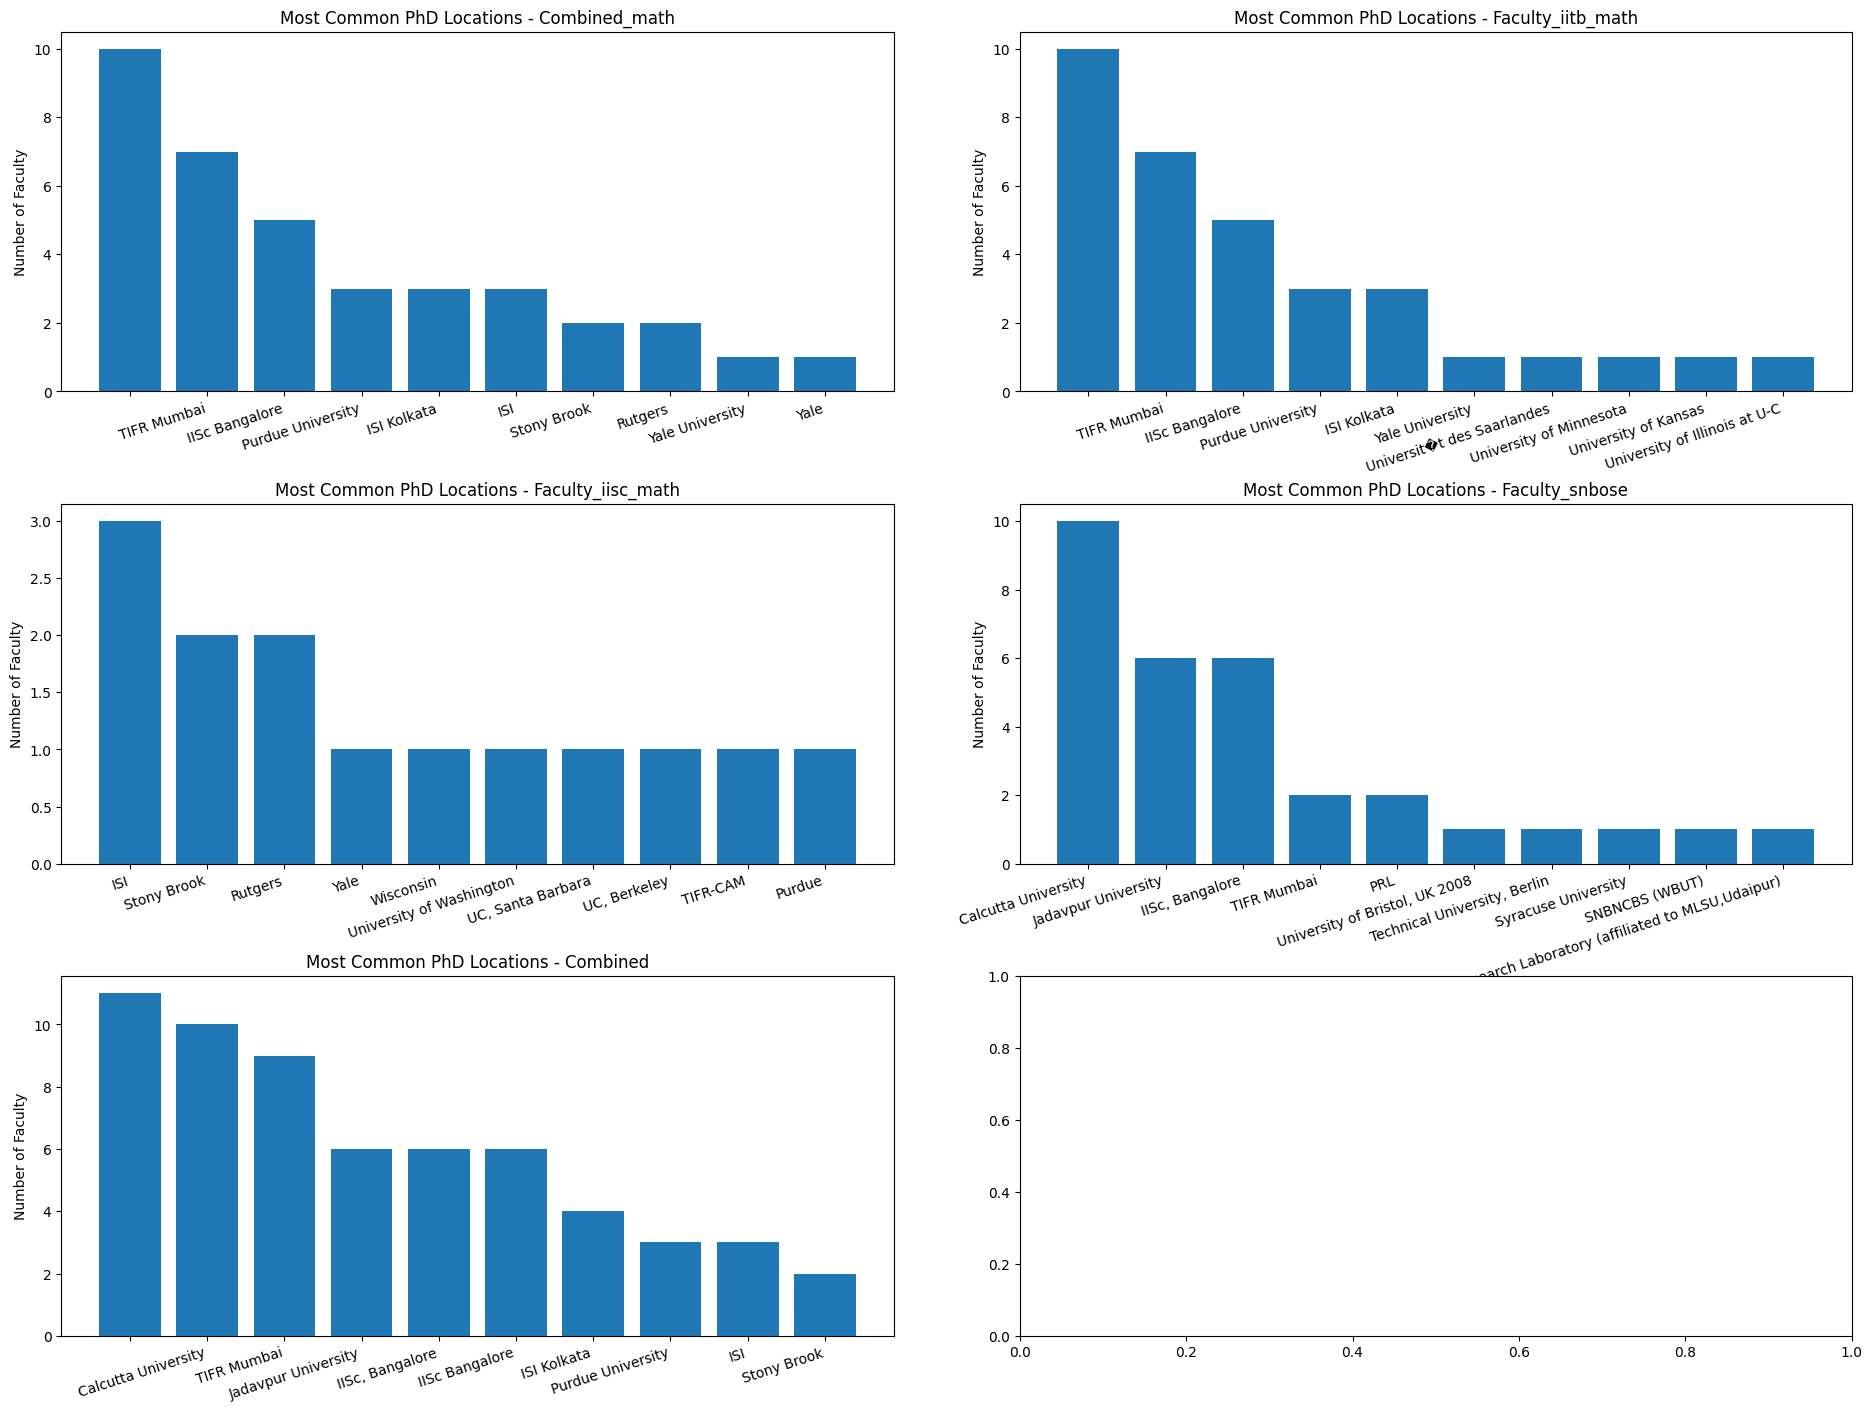

In [4]:
## Most common PhD locations plot

# Connect to the SQLite database
conn = sqlite3.connect('Faculty_list.db')

# Create a 2x2 subplot grid for most common PhD locations
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
fig.tight_layout(pad = 6.0)

# Function to generate and plot most common PhD locations for a specific table
def create_phd_locations_plot(ax, table_name, title_prefix):
    query_phd_locations = f'''
    SELECT Location_of_PhD, COUNT(*) as PhdCount
    FROM {table_name}
    WHERE Location_of_PhD IS NOT NULL
    GROUP BY Location_of_PhD
    ORDER BY PhdCount DESC
    LIMIT 10
    '''
    phd_locations_data = pd.read_sql(query_phd_locations, conn)

    # Plotting
    ax.bar(phd_locations_data['Location_of_PhD'], phd_locations_data['PhdCount'])
    #ax.set_xlabel('PhD Location')
    ax.set_ylabel('Number of Faculty')
    ax.set_title(f'Most Common PhD Locations - {title_prefix}')

    # Set xticks and labels separately
    ax.set_xticks(range(len(phd_locations_data['Location_of_PhD'])))
    ax.set_xticklabels(phd_locations_data['Location_of_PhD'], rotation=18, ha='right')  # Adjust rotation here

# Call the function for each individual table
create_phd_locations_plot(axs[0, 0], 'Faculty_math_combined', 'Combined_math')
create_phd_locations_plot(axs[0, 1], 'faculty_iitb_math', 'Faculty_iitb_math')
create_phd_locations_plot(axs[1, 0], 'faculty_iisc_math', 'Faculty_iisc_math')
create_phd_locations_plot(axs[1, 1], 'faculty_snbose', 'Faculty_snbose')
create_phd_locations_plot(axs[2,0], 'faculty_combined_list', 'Combined')

# Show the combined plot
plt.show()

# Close the database connection
conn.close()
